# Polynomials

## Introduction

In mathematics, a polynomial is an expression consisting of variables and coefficients, that involves only the operations of addition, subtraction, multiplication, and positive-integer powers of variables. An example of a polynomial of a single variable `x` is `x^2 − 4x + 7`. An example with three variables is `x^3 + 2xyz^2 − yz + 1`.

A table that shows the general form a single-variable polynomial up to the 4th degree:

| Degree | Polynomial |
|--------|--------------|
| 0      | $w_0$        |
| 1      | $w_0 + w_1x$   |
| 2      | $w_0 + w_1x + w_2x^2$ |
| 3      | $w_0 + w_1x + w_2x^2 + w_3x^3$ |
| 4      | $w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$ |

* The `w_i` are the coefficients. 
* The _degree_ of a polynomial is the highest power that appears in the polynomial. For example, the polynomial $2 -5x + 3x^2 + 2x^3$ has degree 3 because the highest power of $x$ that appears is 3. 


#### Etymology (origin of the word)
The word polynomial joins two diverse roots: the Greek poly, meaning "many", and the Latin nomen, or "name". That is, it means a sum of many terms.


#### Graphical Examples

* A selection of Polynomial graphs is provided by Wikipedia: https://en.wikipedia.org/wiki/Polynomial#Graphs
* A polynomial plotter is available in: https://www.desmos.com/calculator/kreo2ssqj8

It is a good idea to spend a few minutes with the plotter, to get a sense of how the graphs of some simple polynomials look like.

#### Significance

* Polynomial relationships are very common for describing natural processes. 

* According to [Taylor's theorm](https://en.wikipedia.org/wiki/Taylor%27s_theorem), a polynomial can approximate any differentialble function. To see some examples, check out the link above, and also the one about [Tylor series](https://en.wikipedia.org/wiki/Taylor_series).


## Code

In [20]:
from matplotlib import pyplot as plt
import numpy as np
from typing import List
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Helper Functions (for Plotting)

In [21]:
def create_data_sactter_plot(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X, y)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title('Data')
    return fig, ax

### Generation of Polynomial Data
Below we define a function that generates polynomial data, with or without noise

In [22]:
def generate_polynomial_data(coefficients, bias, xrange=[0,1], n_samples=100, noise=0.05, random_state=0):
    # Generate synthetic data based on a polynomial relationship, with some noise.
    
    # polynomial_coeffients: sorted list of coefficients of the polynomial, starting with the lowest degree, 1. 
    # for instance, if the desired polynomial is 2x^2 + 3x + 1, then the coefficients are [3, 2].
    # polynomial_bias: bias term. For instance, if the desired polynomial is 2x^2 + 3x + 1, then the bias is 1.
    # xrange: range of x values to generate data for, given in [min_x, max_x] format
    # n_samples: number of samples to generate
    # noise: standard deviation of the noise, derived from a normal distribution with mean 0
    # random_state: random seed for reproducibility
    
    # Returns: X, y (numpy arrays) of the generated data

    # generate x values
    np.random.seed(random_state)
    X = np.sort(np.random.rand(100)).reshape(-1, 1)*(max(xrange)-min(xrange)) + min(xrange)
    # generate y values based on the polynomial, and a string of the polynomial equation
    y = bias
    equation = f"y = {bias}"
    for ind, coeff in enumerate(coefficients):
        degree = ind + 1
        y += coeff * X**degree
        equation += f" + {coeff}x^{degree}"
    y = y + np.random.randn(n_samples).reshape(-1, 1)*noise  # add some noise
    # print stats about the generated data
    print(f"Generated {n_samples} data points, with x between {min(xrange)} and {max(xrange)} and y drawn from the polynomial equation:")
    print(equation)
    print(f"with some noise around it (drawn from a normal distribution with mean 0 and standard deviation of {noise})")
    print('***')
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print('First 5 rows of X:')
    print(X[:5])
    print('First 5 rows of y:')
    print(y[:5])
    return X, y

Let's create some data:

_Note that you can change the values of the arguments in the function-call below, try it out :) !
For instance, change (or add) values in the `coefficients` list. Or change the `noise` value...
Experiment :) !_ 

In [23]:
X, y = generate_polynomial_data(coefficients=[3, 2, 4], bias=1, xrange=[-10,10], n_samples=100, noise=0.05, random_state=0)

Generated 100 data points, with x between -10 and 10 and y drawn from the polynomial equation:
y = 1 + 3x^1 + 2x^2 + 4x^3
with some noise around it (drawn from a normal distribution with mean 0 and standard deviation of 0.05)
***
X shape: (100, 1)
y shape: (100, 1)
First 5 rows of X:
[[-9.90609048]
 [-9.62420399]
 [-9.59784908]
 [-9.59563205]
 [-9.21624415]]
First 5 rows of y:
[[-3720.87881034]
 [-3408.35618845]
 [-3380.09863366]
 [-3377.82699503]
 [-2987.97601915]]


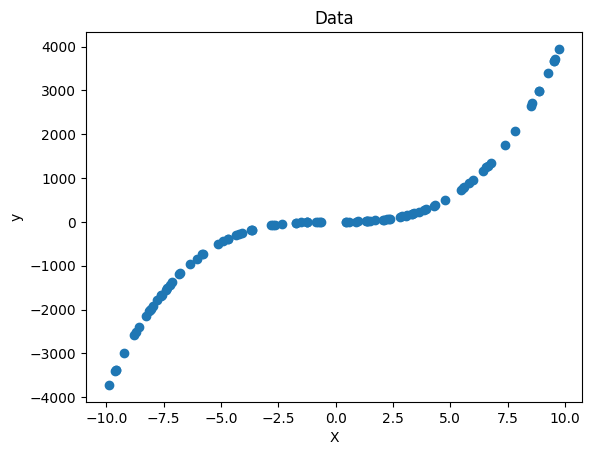

In [24]:
fig, ax = create_data_sactter_plot(X, y)

_To the Student_: What is the degree of this polynomial? What is the bias term?

### Creating a Polynomial Model in Scikit-Learn

We would like to create a Polymonomial model of the data, and fit it using linear regression. 
Scikit-Learn provides two approaches for creating a polynomial model. Both follow the same steps. 
The first one we're introducing is breaking down the process into two steps:
1. Create polynomial features
2. Define a linear regression model

In [25]:
def create_polynomial_model(degree, X=X):
    # Use PolynomialFeatures to create polynomials as a new feature
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    # Create a linear model
    model = LinearRegression()
    return model, X_poly

Let's follow these two steps, and create a polynomial model of the 3rd degree:

In [26]:
model, X_poly = create_polynomial_model(degree=3, X=X)

Let's see what we've got:

In [27]:
print(f"X shape: {X.shape}")
print(f"x_poly shape: {X_poly.shape}")
print(f"First 5 rows of X:")
print(X[:5])
print(f"First 5 rows of x_poly:")
print(X_poly[:5])

X shape: (100, 1)
x_poly shape: (100, 3)
First 5 rows of X:
[[-9.90609048]
 [-9.62420399]
 [-9.59784908]
 [-9.59563205]
 [-9.21624415]]
First 5 rows of x_poly:
[[  -9.90609048   98.13062852 -972.09088462]
 [  -9.62420399   92.62530247 -891.44480568]
 [  -9.59784908   92.11870689 -884.14144583]
 [  -9.59563205   92.07615446 -883.52889891]
 [  -9.21624415   84.93915632 -782.82000298]]


We've created a new NumPy array, `x_poly` with two additional columns, one with data representing `x^2` and one with `x^3`.
We also created `model` - a `LinearRegression` object, that we could run these data on for fitting.
Let's do this fitting next:

In [28]:
model.fit(X_poly, y)

LinearRegression()

That's it ! The fitting of the linear model to the `X_poly` data is done !

Let's explore the updated `model` object, and see what we've got.

For this, let's create two new helper functions: one for printing some data about the model, and a second for plotting the model's predictions together with the training data.

In [29]:
def print_model_stats(model):
    # print model    
    print(f'Model: {model}')
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_[0]}')
    # generate equation string:
    equation = f"y = {model.intercept_[0]:.2f}"
    for ind, coeff in enumerate(model.coef_[0]):
        degree = ind + 1
        equation += f" + {coeff:.2f}x^{degree}"
    print(f'Equation: {equation}')
    print('***')

In [30]:
print_model_stats(model)

Model: LinearRegression()
Coefficients: [[2.99631438 1.99992718 4.00003182]]
Intercept: 1.0113667218020197
Equation: y = 1.01 + 3.00x^1 + 2.00x^2 + 4.00x^3
***


We see that we got a pretty good fit !

Now, let's look at the second method for definning a model. It follows the same two steps, but combines them into a _pipeline_:

_note that we use the original `X` as input. The pipeline is creating the features for us as its first step. `x` itself is not being modified. The new features are only part of the pipeline._

In [31]:
model = Pipeline([('polynomial', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression())])
model.fit(X, y)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

Since we already ran the fit with this second method, we can go ahead and print its model stats:

In [35]:
def print_pipeline_model_stats(model):
    # print model    
    print(f'Model: {model}')
    print(f'Coefficients: {model[-1].coef_[0][1:]}')
    print(f'Intercept: {model[-1].intercept_[0]}')
    # generate equation string:
    equation = f"y = {model[-1].intercept_[0]:.2f}"
    for ind, coeff in enumerate(model[-1].coef_[0][1:]):
        degree = ind + 1
        equation += f" + {coeff:.2f}x^{degree}"
    print(f'Equation: {equation}')
    print('***')

In [36]:
print_pipeline_model_stats(model)

Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])
Coefficients: [2.99631438 1.99992718 4.00003182]
Intercept: 1.0113667218018918
Equation: y = 1.01 + 3.00x^1 + 2.00x^2 + 4.00x^3
***


Now let's plot the model together with its training data:

In [37]:
def plot_model(X, y, model):
    # Calculate the number of rows and columns for the subplots
    X_continuous = np.linspace(min(X), max(X), 100)
    fig, ax = plt.subplots()
    ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    ax.plot(X_continuous, model.predict(X_continuous), label="Model", linewidth=2)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    plt.show()

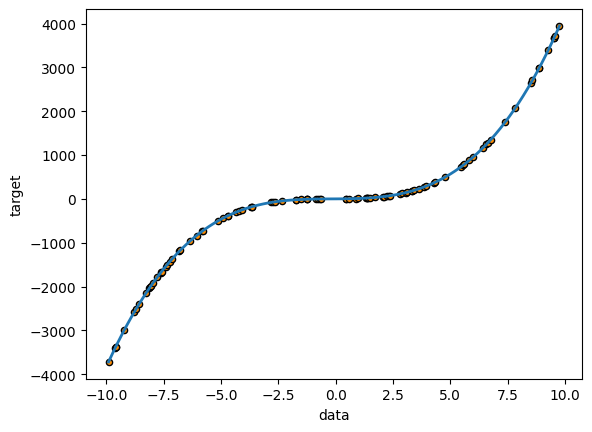

In [38]:
plot_model(X, y, model)

## Multiple Polynomial Models

How can we automatically define and fit multiple polynomial models at once? 
This could help us later see which one provides the best prediction.

Let's create a function to automate this process:

In [42]:
def create_polynomial_models(X: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict[int, np.poly1d]:
    """
    Creates polynomial models for the given degrees and fits them to the given data.

    Args
        X: The x values of the data.
        y: The y values of the data.
        degrees: A list of polynomial degrees to try.

    Returns:
        A dictionary of polynomial models, with the polynomial degree as the key.
    """

    models = {}
    for degree in degrees:
        model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
        model.fit(X, y)
        models[degree] = model
    return models

With the function that we've just defined, let's create 6 polynomial models, from degree 0 (constant) and up to a degree of 5:

In [43]:
degrees = list(range(0, 6))
models = create_polynomial_models(X.reshape(-1, 1), y, degrees)

In [44]:
models

{0: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                 ('linear', LinearRegression())]),
 1: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                 ('linear', LinearRegression())]),
 2: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                 ('linear', LinearRegression())]),
 3: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())]),
 4: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                 ('linear', LinearRegression())]),
 5: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                 ('linear', LinearRegression())])}

In [45]:
# print models
for degree, model in models.items():
    print_pipeline_model_stats(model)


Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                ('linear', LinearRegression())])
Coefficients: []
Intercept: -98.56815808072905
Equation: y = -98.57
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])
Coefficients: [247.42955277]
Intercept: 36.06400435758873
Equation: y = 36.06 + 247.43x^1
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])
Coefficients: [249.49585992   2.98608301]
Intercept: -62.97443847209672
Equation: y = -62.97 + 249.50x^1 + 2.99x^2
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])
Coefficients: [2.99631438 1.99992718 4.00003182]
Intercept: 1.0113667218018918
Equation: y = 1.01 + 3.00x^1 + 2.00x^2 + 4.00x^3
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])
C

In [46]:
def plot_multiple_models(X, y, models):
    # Calculate the number of rows and columns for the subplots
    X_continuous = np.linspace(min(X), max(X), 100)
    n_plots = len(models)
    n_cols = int(np.ceil(np.sqrt(n_plots)))
    n_rows = int(np.ceil(n_plots / n_cols))
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 6))
    fig.tight_layout(pad=3.0)
    axs = axs.flatten()
    for i, (name, model) in enumerate(models.items()):
        axs[i].scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
        axs[i].plot(X_continuous, model.predict(X_continuous), label=f"Model={name}", linewidth=2)
        axs[i].set_xlabel("data")
        axs[i].set_ylabel("target")
        axs[i].set_title(f"Model={name}")
    plt.show()

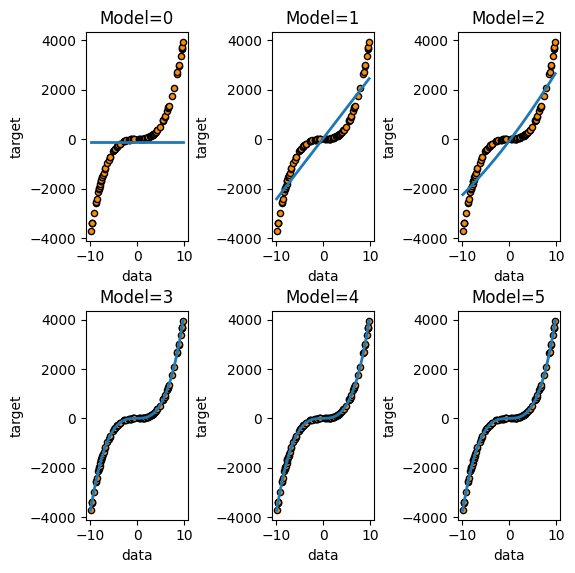

In [48]:
plot_multiple_models(X, y, models)